Note: copied and modified from "Presentation_042123.ipynb" in ./ztrax_FL/DataViz

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

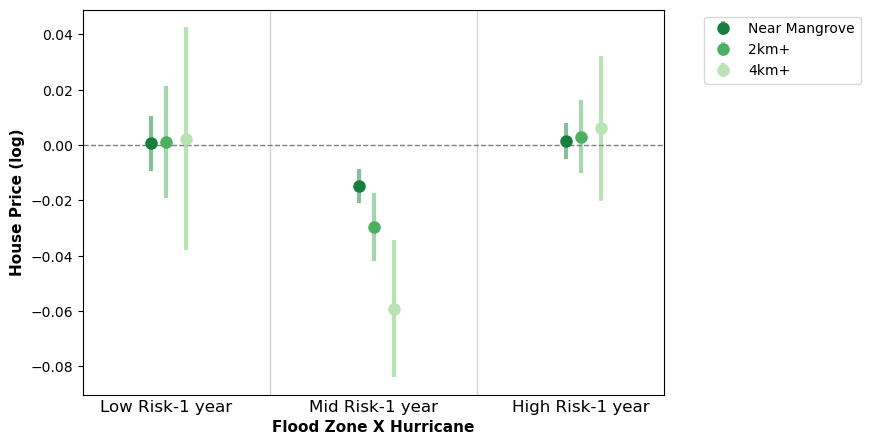

In [23]:
from matplotlib.transforms import ScaledTranslation
import matplotlib.pyplot as plt

# keep 3 colors (we still plot 3 series)
colors = plt.cm.Greens_r([0.4, 0.2, 0.7])

# 2 groups only
x = [
    "Low Risk-1 year", "Mid Risk-1 year", "High Risk-1 year"
]
# near mangrove, 2km+, and 4km+
y1    = [0.0005698	,	-0.0147749	,	0.0015217]
yerr1 = [0.0100902	,	0.0061891	,	0.0065645]

y2    = [0.0011396	,	-0.0295498	,	0.0030433]
yerr2 = [ 0.0201809	,	0.0123783	,	0.013129]

y3    = [0.0022793	,	-0.0590997	,	0.0060866]
yerr3 = [0.0403617	,	0.0247566	,	0.0262581]

fig, ax = plt.subplots(figsize=(7.5, 5))

# same small horizontal nudges for the 3 series
# trans1 = ax.transData + ScaledTranslation(-100/1000, 0, fig.dpi_scale_trans)
# trans2 = ax.transData + ScaledTranslation(+50/1000,  0, fig.dpi_scale_trans)
# trans3 = ax.transData + ScaledTranslation(+200/1000, 0, fig.dpi_scale_trans)
trans1 = ax.transData + ScaledTranslation(-150/1000, 0, fig.dpi_scale_trans)
trans2 = ax.transData + ScaledTranslation(0/1000,   0, fig.dpi_scale_trans)
trans3 = ax.transData + ScaledTranslation(+200/1000, 0, fig.dpi_scale_trans)
ax.margins(x=0.2)  # adds 20% padding on both sides of x-axis

er1 = ax.errorbar(x, y1, yerr=yerr1, color=colors[1], marker="o", markersize=8,
                  elinewidth=3, linestyle="none", transform=trans1, label="Near Mangrove")
er1[-1][0].set_alpha(0.5)

er2 = ax.errorbar(x, y2, yerr=yerr2, color=colors[0], marker="o", markersize=8,
                  elinewidth=3, linestyle="none", transform=trans2, label="2km+")
er2[-1][0].set_alpha(0.5)

er3 = ax.errorbar(x, y3, yerr=yerr3, color=colors[2], marker="o", markersize=8,
                  elinewidth=3, linestyle="none", transform=trans3, label="4km+")

plt.xticks(rotation=0, ha="center")  # Tilt x-axis labels
ax.tick_params(axis='x', length=0)  # removes the short vertical ticks
ax.tick_params(axis='x', labelsize=12)  # Smaller font for x-axis labels
# ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

# Add vertical separators between categories
for xpos in [0.5, 1.5]:
    ax.axvline(x=xpos, color='lightgray', linestyle='-', linewidth=1)

# Horizontal dashed line at 0
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)

plt.legend(bbox_to_anchor=(1.35, 1))
plt.xlabel("Flood Zone X Hurricane", fontweight='bold', fontsize=11)
plt.ylabel("House Price (log)", fontweight='bold', fontsize=11)

plt.savefig('../../Results/Figures/benchmark-floodrisk-1styear.png', bbox_inches='tight', dpi=500)
plt.show()
